In [106]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
matplotlib.rcParams.update({'font.size': 20})

In [3]:
model_dir = Path("./models/")
result_dir = Path("./result/")
fig_dir = Path("./paper/")
if not fig_dir.exists():
    fig_dir.mkdir()

In [116]:
def plot_model(model, fig_name, fig_dir, src=False, vmax=None, vmin=None):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    plt.figure(figsize=(12,8))
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['vp'].T/1e3, vmax=vmax, vmin=vmin, rasterized=True)
    if src:
        plt.plot(x[receiver[0][0]]/1e3-x0, y[receiver[0][1]]/1e3, 'wv', alpha=0.5)
        for i in range(len(source)):
            plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*')
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s', fontsize=14)
    plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight')
    plt.show()

In [118]:
def plot_result(result, model, fig_name, fig_dir, src=False, vmax=None, vmin=None):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    plt.figure(figsize=(12,8))
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result/1e3, vmax=vmax, vmin=vmin, rasterized=True)
    if src:
        plt.plot(x[receiver[0][0]]/1e3-x0, y[receiver[0][1]]/1e3, 'wv', alpha=0.5)
        for i in range(len(source)):
            plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*')
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb.ax.set_title('km/s', fontsize=14)
    plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight')
    plt.show()

In [61]:
def plot_std(std, vp, model, fig_name, fig_dir, src=False, vmax=None, vmin=None):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    plt.figure(figsize=(12,8))
    plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/1e3, rasterized=True)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb.ax.set_title('km/s', fontsize=14)
    plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+"_std.pdf"), bbox_inches='tight')

    plt.figure(figsize=(12,8))
    # plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/(np.abs(vp - model["vp"].T) + 1) * 100, rasterized=True)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/np.abs(vp) * 100, rasterized=True)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb.ax.set_title('%', fontsize=14)
    plt.savefig(fig_dir.joinpath(fig_name+"_std100.png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+"_std100.pdf"), bbox_inches='tight')
    plt.show()

In [5]:
def plot_subdir(subdir):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.figure()
    plt.semilogy(loss[:,0], loss[:,1])

    fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
    inv_result = np.loadtxt(fname)
    plot_result(inv_result, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)


In [64]:
model_true = sio.loadmat(model_dir.joinpath("BP-model-true.mat"))
model_smooth = sio.loadmat(model_dir.joinpath("BP-model-smooth.mat"))

In [65]:
receiver = model_true['receiver'][0][0][0]
source = model_true['source'][0]
vmax = np.max(model_true['vp'])/1e3
vmin = np.min(model_true['vp'])/1e3

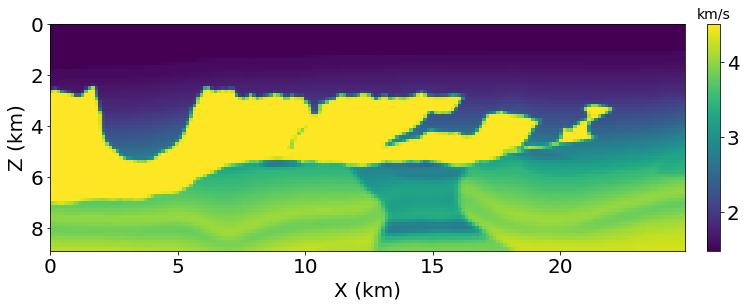

In [117]:
plot_model(model_true, "BP_model_true", fig_dir)

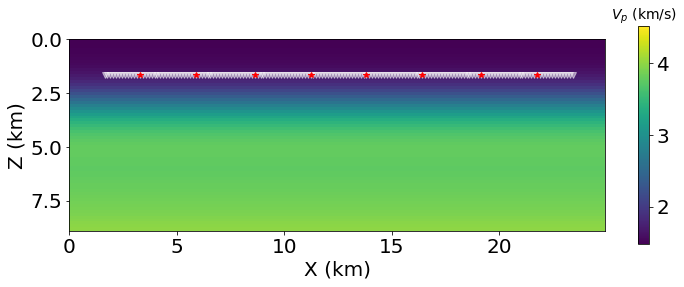

In [12]:
plot_model(model_smooth, "BP_model_smooth", fig_dir, src=True, vmax=vmax, vmin=vmin)

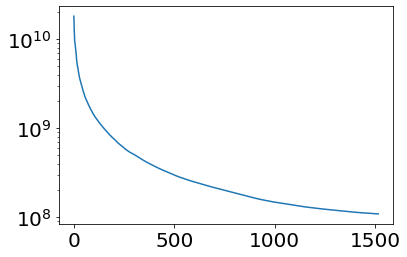

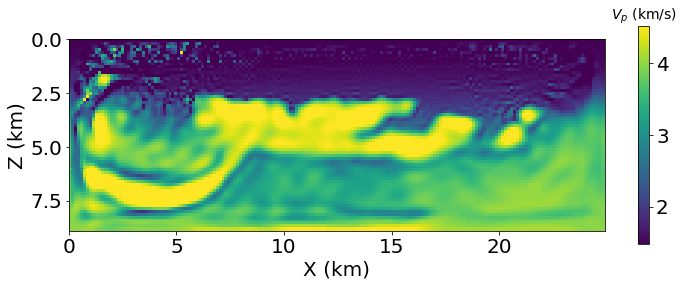

In [26]:
subdir = "FWI/BP"
plot_subdir(subdir)

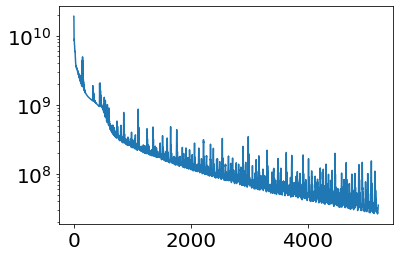

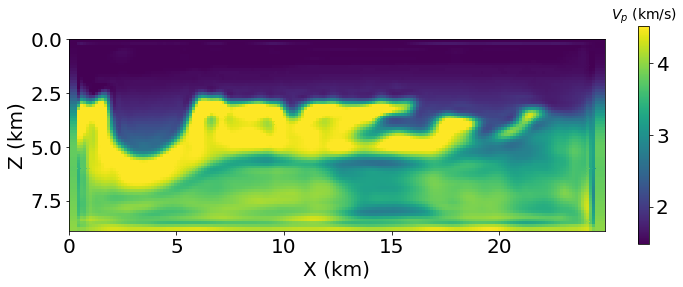

In [28]:
subdir = "NNFWI/BP"
plot_subdir(subdir)

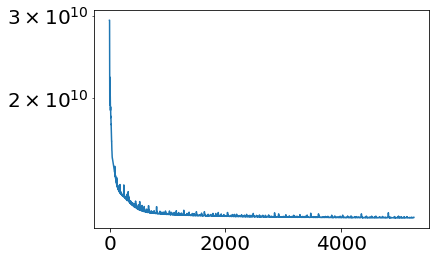

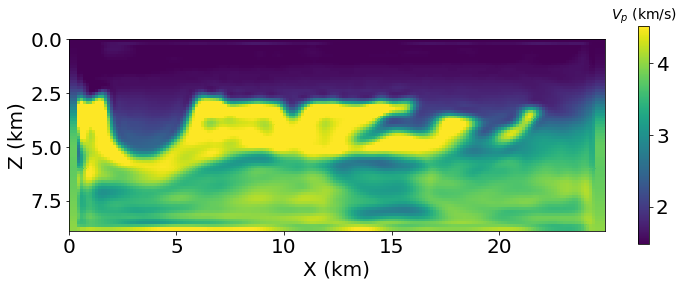

In [29]:
subdir = "NNFWI/BP_noise05"
plot_subdir(subdir)

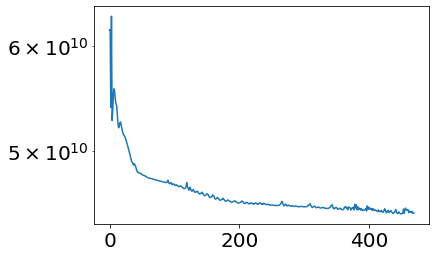

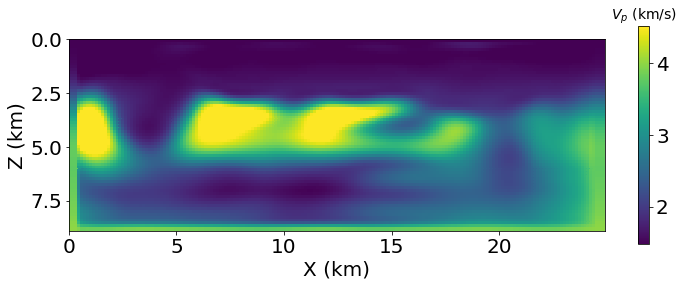

In [30]:
subdir = "NNFWI/BP_noise10"
plot_subdir(subdir)

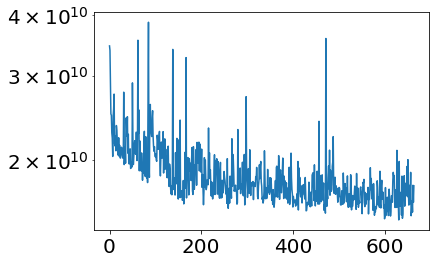

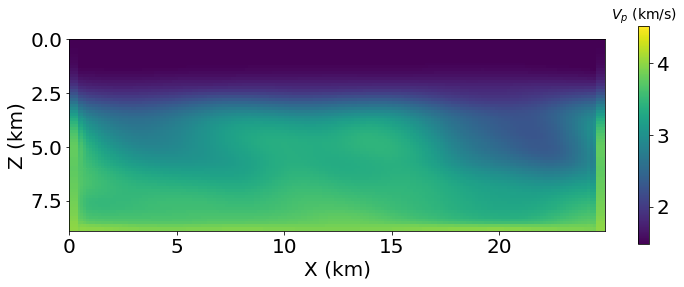

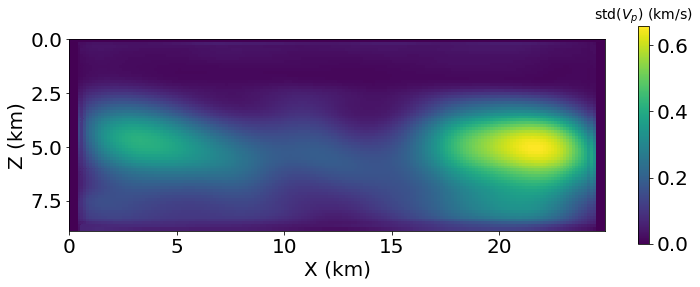

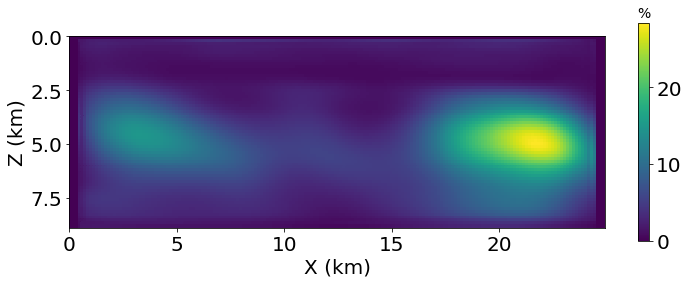

In [49]:
subdir = "NNFWI/BP_UQ"
plot_subdir(subdir)

vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
vp = np.loadtxt(vp)
std = np.loadtxt(std)
plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

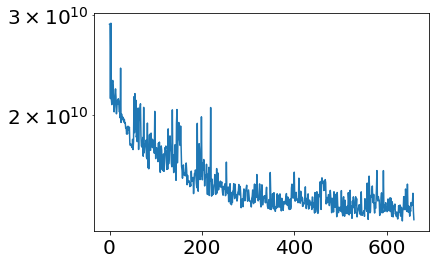

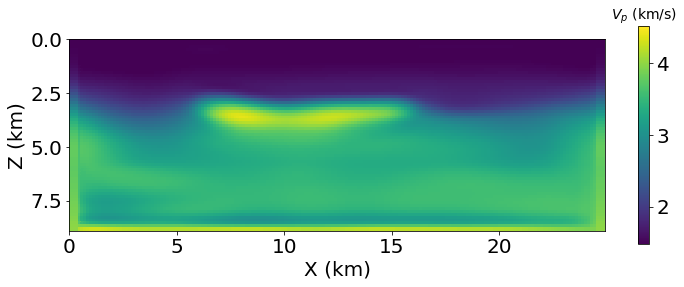

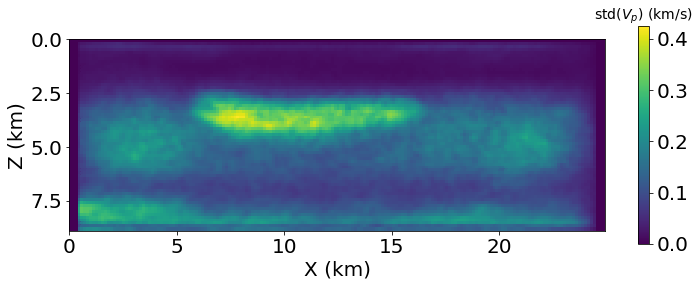

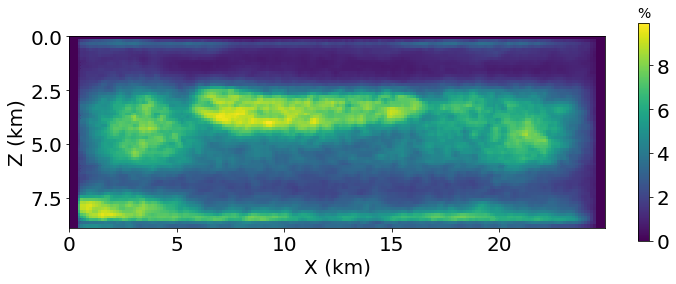

In [50]:
subdir = "NNFWI/BP_UQ_2"
plot_subdir(subdir)

vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
vp = np.loadtxt(vp)
std = np.loadtxt(std)
plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [51]:
model_true = sio.loadmat(model_dir.joinpath("marmousi2-model-true.mat"))
model_smooth = sio.loadmat(model_dir.joinpath("marmousi2-model-smooth.mat"))
receiver = model_true['receiver'][0][0][0]
source = model_true['source'][0]
vmax = np.max(model_true['vp'])/1e3
vmin = np.min(model_true['vp'])/1e3

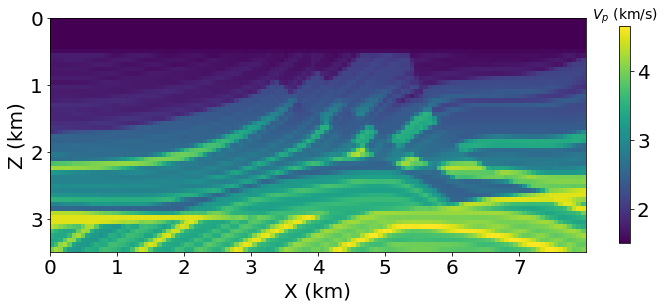

In [33]:
plot_model(model_true, "marmousi_model_true", fig_dir)

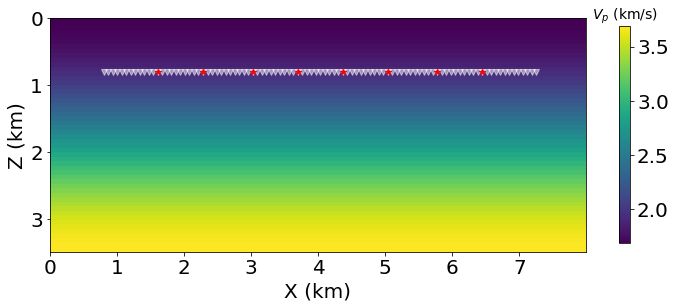

In [34]:
plot_model(model_smooth, "marmousi_model_smooth", fig_dir, src=True)

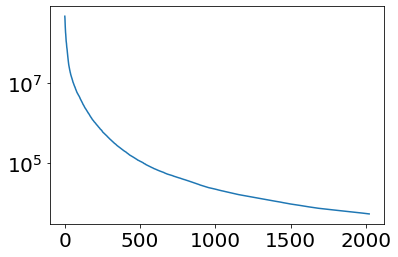

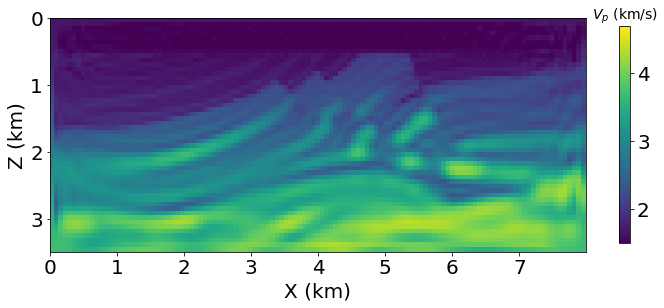

In [35]:
subdir = "FWI/marmousi"
plot_subdir(subdir)

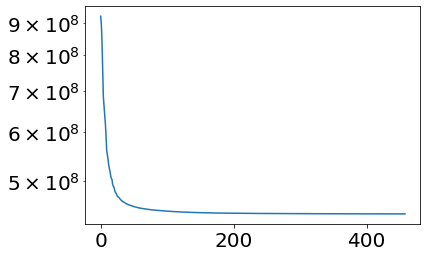

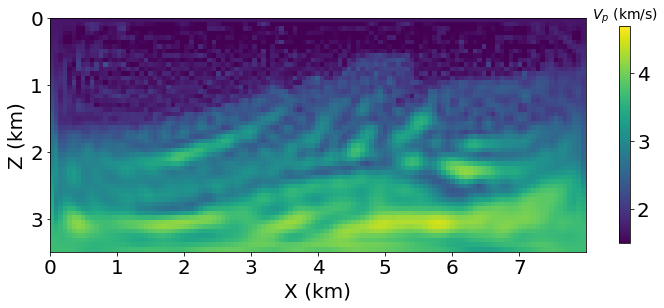

In [37]:
subdir = "FWI/marmousi_noise05"
plot_subdir(subdir)

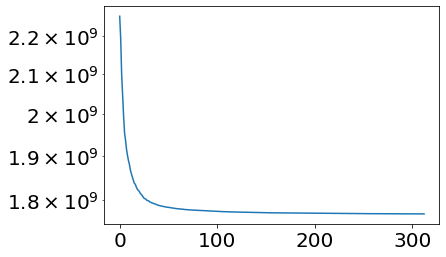

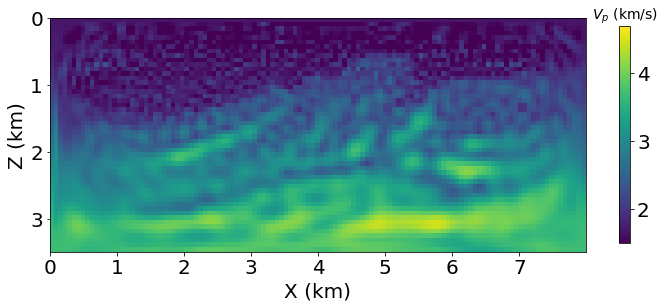

In [38]:
subdir = "FWI/marmousi_noise10"
plot_subdir(subdir)

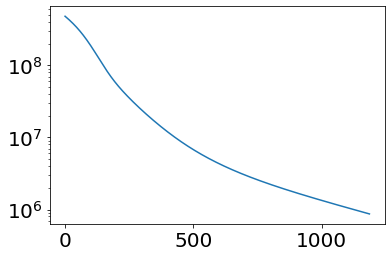

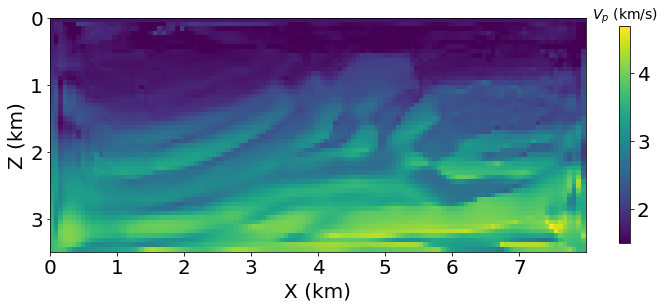

In [36]:
subdir = "FWI/marmousi_adam"
plot_subdir(subdir)

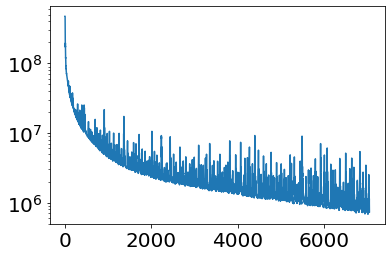

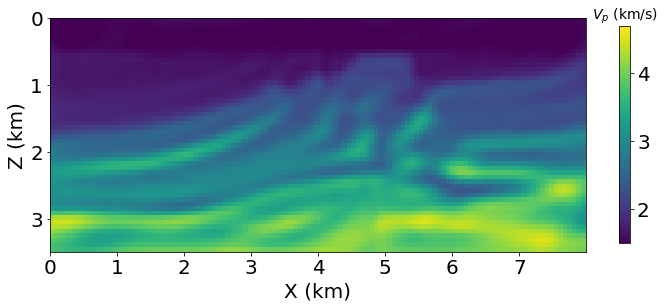

In [39]:
subdir = "NNFWI/marmousi"
plot_subdir(subdir)

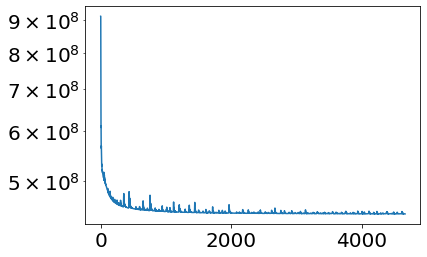

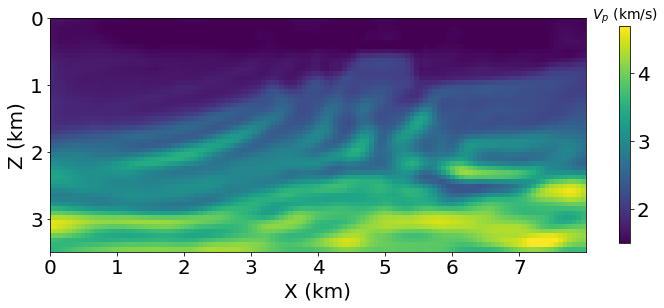

In [40]:
subdir = "NNFWI/marmousi_noise05"
plot_subdir(subdir)

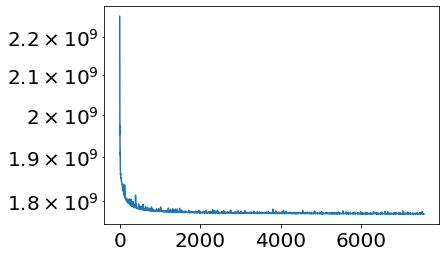

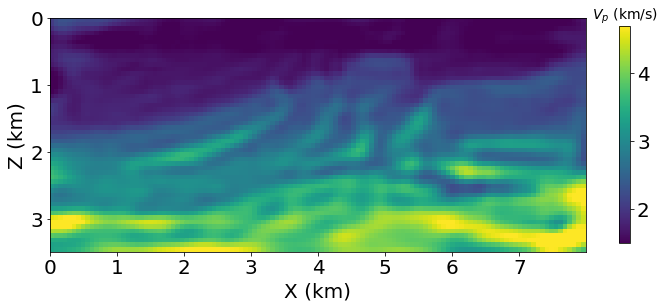

In [41]:
subdir = "NNFWI/marmousi_noise10"
plot_subdir(subdir)

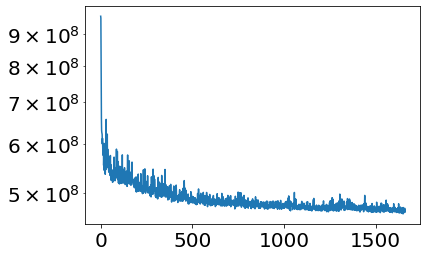

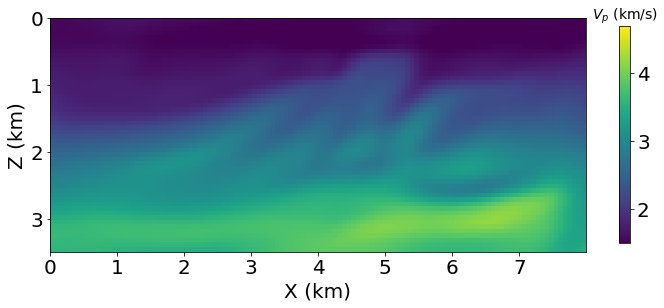

In [42]:
subdir = "NNFWI/marmousi_UQ"
plot_subdir(subdir)

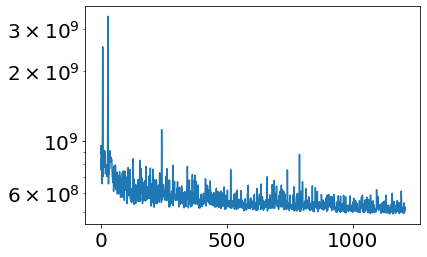

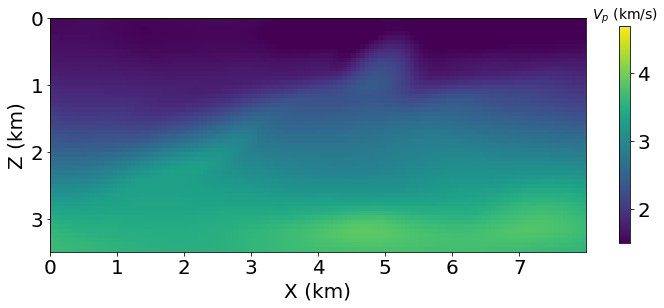

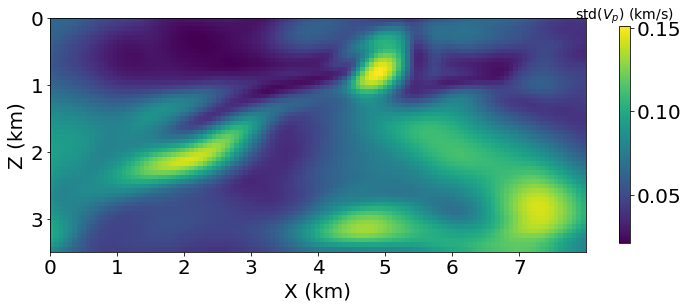

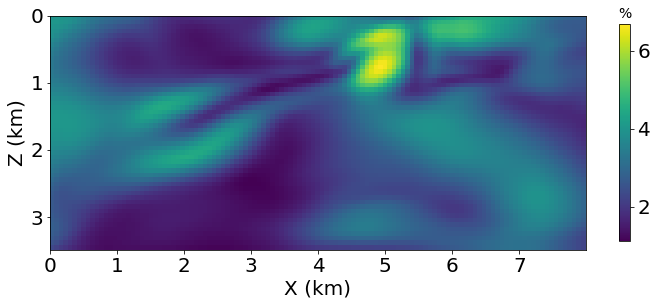

In [52]:
subdir = "NNFWI/marmousi_UQ"
plot_subdir(subdir)

vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
vp = np.loadtxt(vp)
std = np.loadtxt(std)
plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

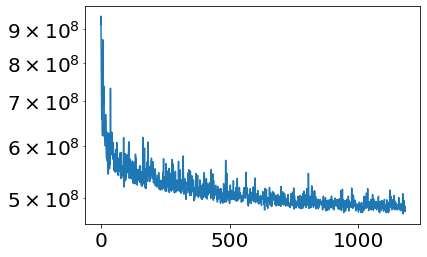

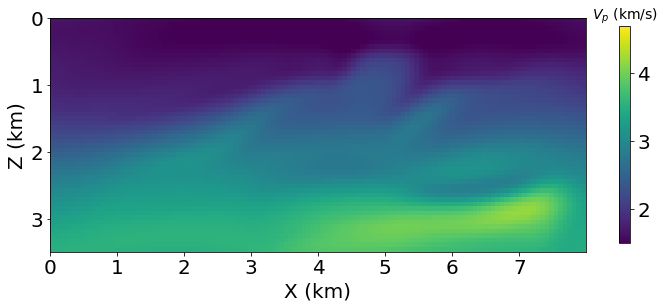

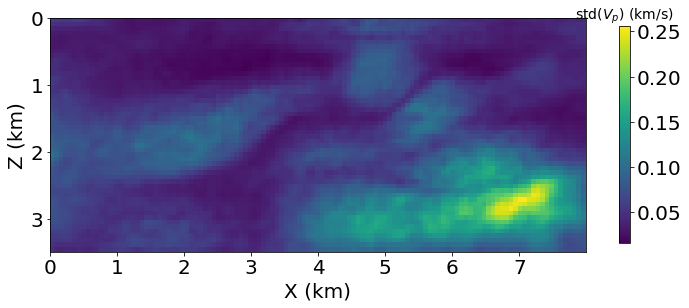

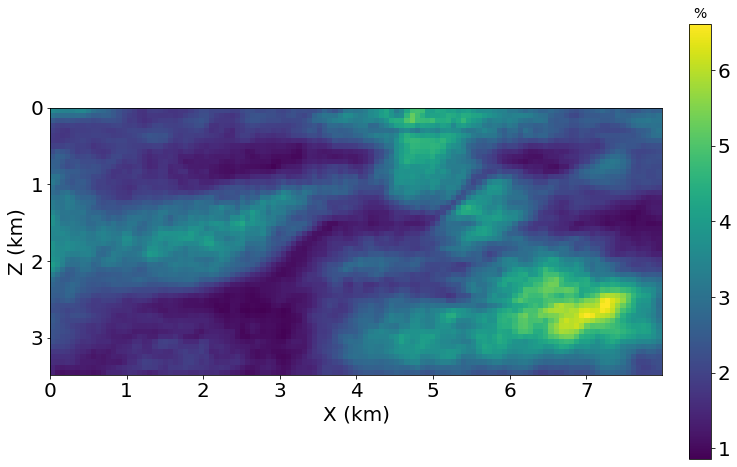

In [60]:
subdir = "NNFWI/marmousi_UQ_2"
plot_subdir(subdir)

vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
vp = np.loadtxt(vp)
std = np.loadtxt(std)
plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [43]:
subdir = "NNFWI/marmousi_BFGS"
plot_subdir(subdir)

ValueError: Wrong number of columns at line 2

In [44]:
subdir = "PhysGNN/marmousi"
plot_subdir(subdir)

ValueError: could not convert string to float: "PyObject <tf.Tensor 'IdentityN:1' shape=() dtype=float64>"